In [ ]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

from abc import ABC, abstractmethod
from typing import Optional

# K-armed Testbed

This is the basic environment for the k-armed bandit problem as discussed in Sutton & Barto.

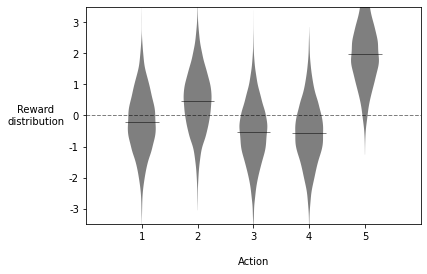

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import interface
import agents
import environments

k=5
env = environments.KArmedBandit(k=5, seed=12345)
fig, ax = plt.subplots()
env.plot_reward_dists(ax)

Clearly Action $a=5$ has the highest expected reward.

In [4]:
print(f"Most optimal action: {env.opt_action+1}")

Most optimal action: 5


In [10]:
k=10
env = environments.KArmedBandit(k=k, seed=12345)
agent = agents.EpsilonGreedyAgent(k=k, epsilon=0.75)

agent.reset()
at, ro, gf = interface.run(agent=agent, environment=env, num_steps=200)

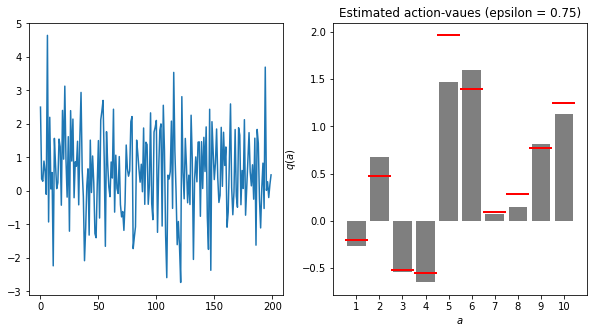

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].plot(ro)
interface.plot_results(agent, env, ax[1])

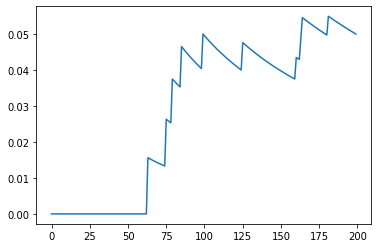

In [20]:
plt.plot(np.cumsum(at == env.opt_action) / np.arange(1, len(at)+1, 1))